In [1]:
%%time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
import plotly as py
from plotly.offline import iplot
import scipy as sp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

adult_income = pd.read_csv('adult_data.csv')
adult_income.head(33000)

CPU times: total: 1.03 s
Wall time: 1.55 s


,Age,Work_Class,Annual_Income,Education,Education_Level,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Income_Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
%%time

adult_income.describe()

CPU times: total: 0 ns
Wall time: 21.1 ms


,Age,Annual_Income,Education_Level,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Work_Class=='?']
adult_income.drop(adult_income[adult_income['Work_Class'] == '?'].index,inplace=True)
adult_income['Work_Class'].unique()

CPU times: total: 0 ns
Wall time: 11 ms


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [4]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Annual_Income=='?']
adult_income.drop(adult_income[adult_income['Annual_Income'] == '?'].index,inplace=True)
adult_income['Annual_Income'].unique()

CPU times: total: 0 ns
Wall time: 14.5 ms


array([ 77516,  83311, 215646, ...,  84661, 257302, 201490], dtype=int64)

In [5]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Occupation=='?']
adult_income.drop(adult_income[adult_income['Occupation'] == '?'].index,inplace=True)
adult_income['Occupation'].unique()

CPU times: total: 0 ns
Wall time: 22.2 ms


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [6]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Native_Country=='?']
adult_income.drop(adult_income[adult_income['Native_Country'] == '?'].index,inplace=True)
adult_income['Native_Country'].unique()

CPU times: total: 0 ns
Wall time: 5.64 ms


array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [7]:
%%time

#checking number of records after dropping the missing data
adult_income.head(33000)

CPU times: total: 0 ns
Wall time: 0 ns


,Age,Work_Class,Annual_Income,Education,Education_Level,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Income_Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


CPU times: total: 0 ns
Wall time: 55.6 ms


<=50K    22654
>50K      7508
Name: Income_Target, dtype: int64

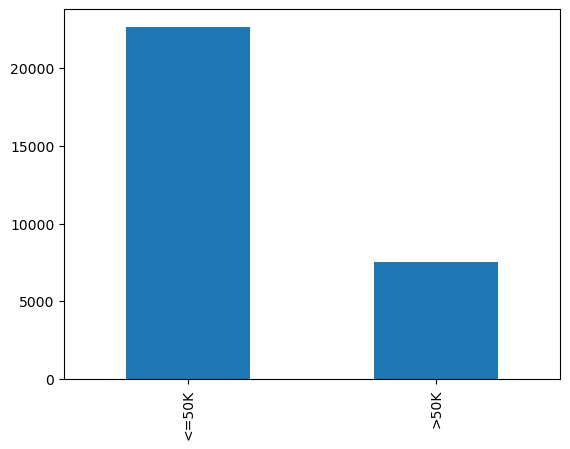

In [8]:
%%time

adult_income['Income_Target'].value_counts().plot(kind='bar')
adult_income['Income_Target'].value_counts()

CPU times: total: 344 ms
Wall time: 621 ms


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Farming-fishing'),
  Text(8, 0, 'Machine-op-inspct'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Craft-repair'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

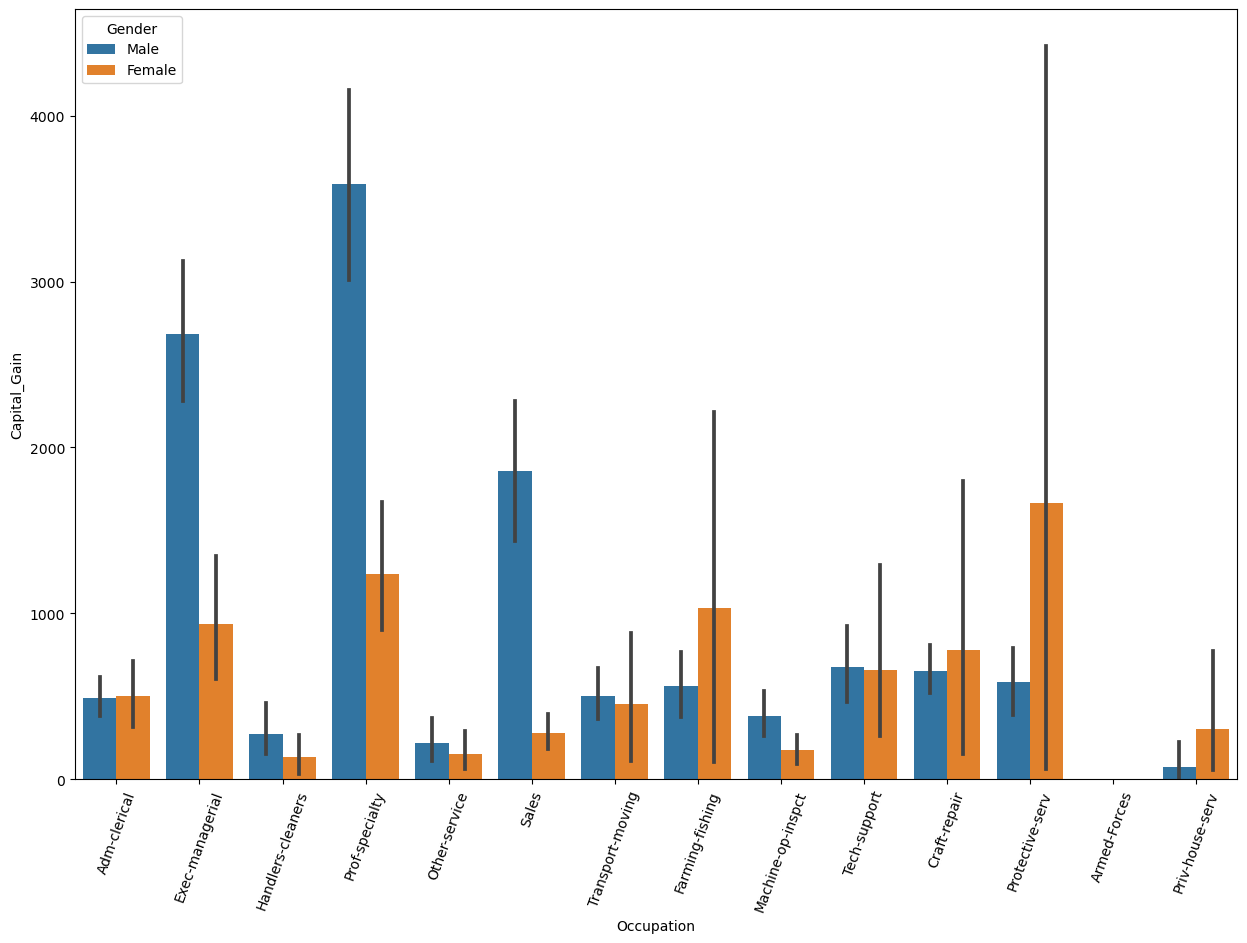

In [9]:
%%time 

#Checking the distribution of Capital_gain and  Occupation as per gender
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_Gain',data=adult_income,hue='Gender')
plt.xticks(rotation=70)

CPU times: total: 484 ms
Wall time: 667 ms


<Axes: xlabel='Education', ylabel='Hours_per_week'>

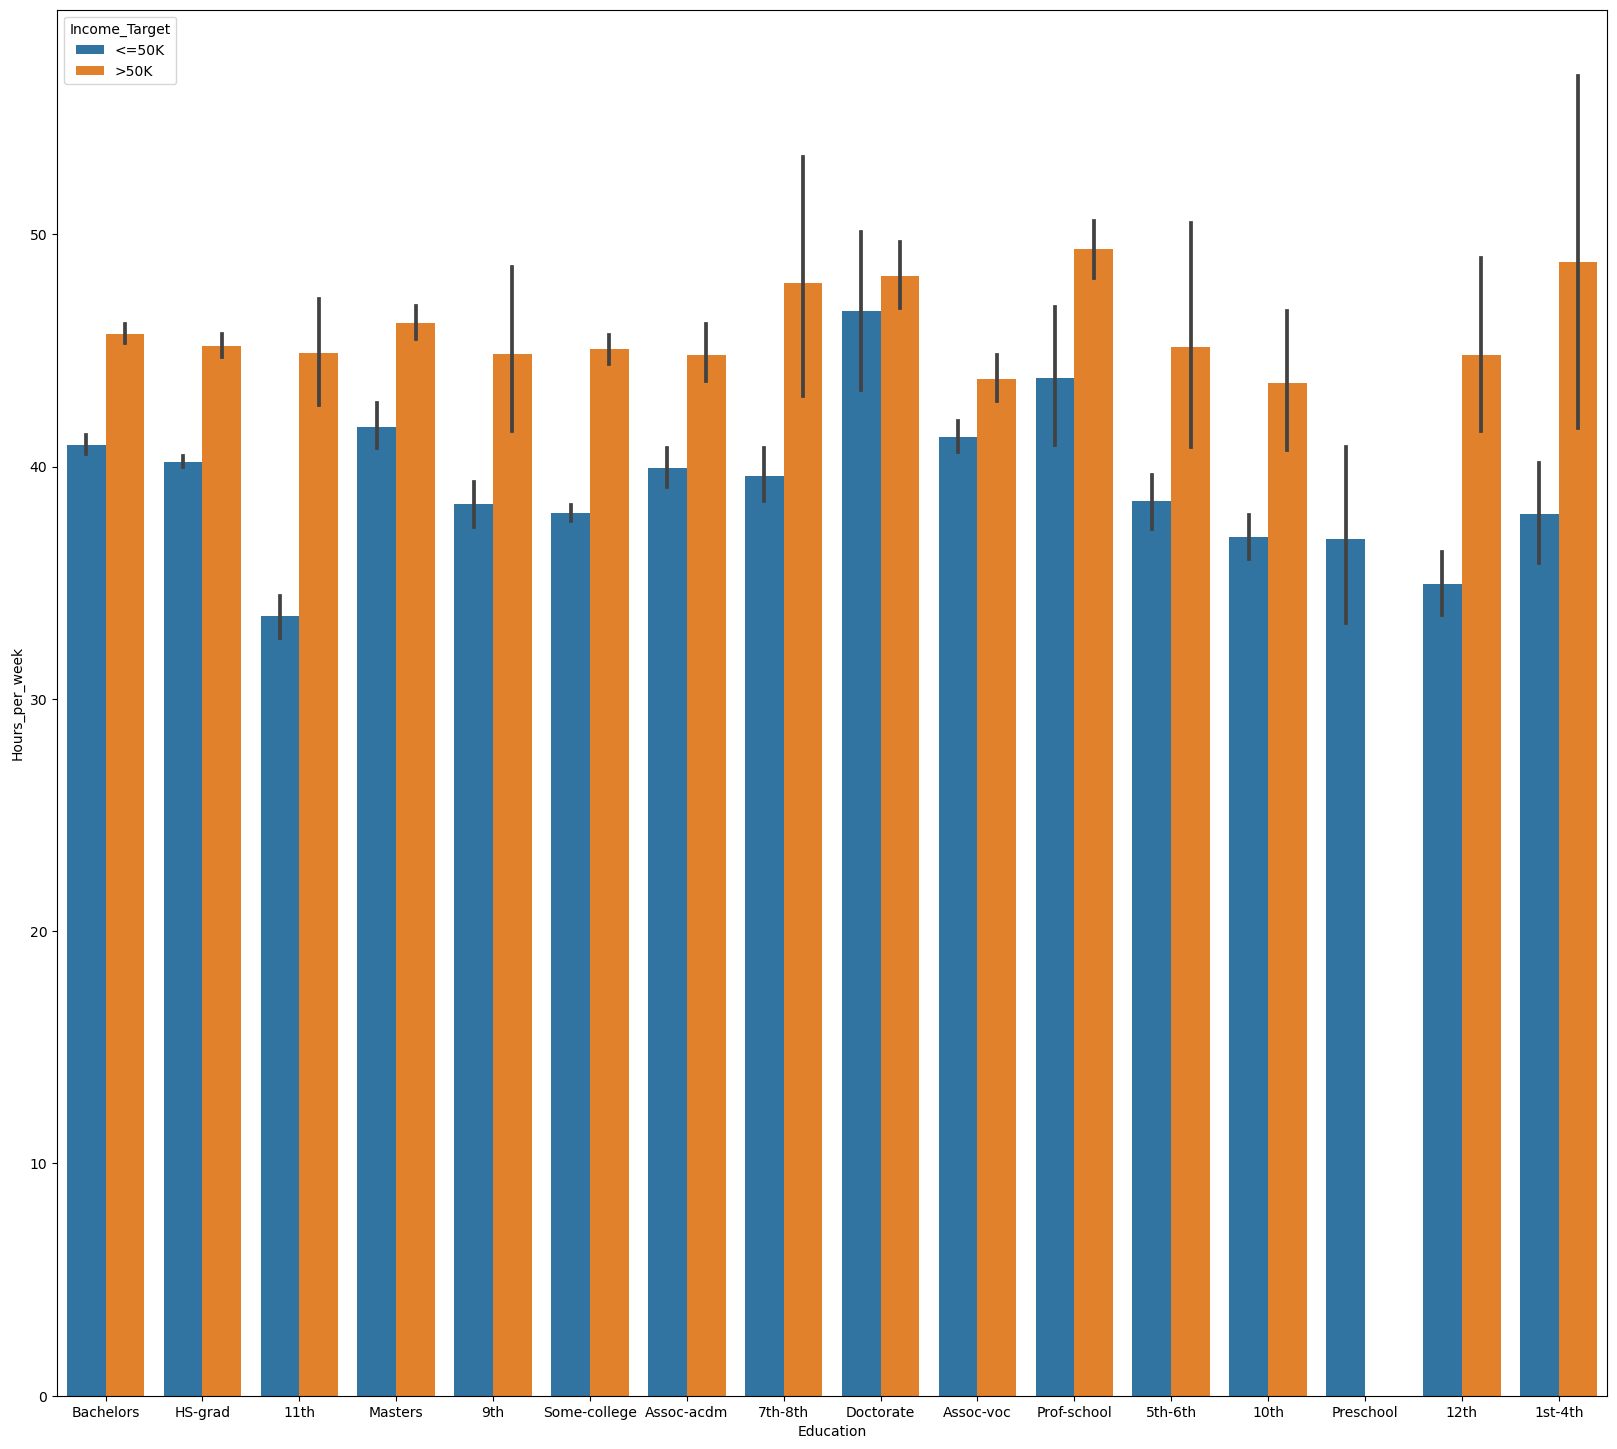

In [10]:
%%time

#Checking the distribution of Education and  Hours_per_week as gender
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=adult_income,hue='Income_Target')

In [11]:
%%time

le = LabelEncoder() # label encoder 
adult_income['Income_Target']=le.fit_transform(adult_income['Income_Target'])
adult_income['Gender']=le.fit_transform(adult_income['Gender'])
#Converting 2 columns into binary 
adult_income = pd.get_dummies(adult_income,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

adult_income.head(33000)

CPU times: total: 31.2 ms
Wall time: 42.7 ms


,Age,Annual_Income,Education_Level,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Income_Target,Work_Class_Local-gov,Work_Class_Private,Work_Class_Self-emp-inc,Work_Class_Self-emp-not-inc,Work_Class_State-gov,Work_Class_Without-pay,Education_11th,Education_12th,Education_1st-4th,Education_5th-6th,Education_7th-8th,Education_9th,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_HS-grad,Education_Masters,Education_Preschool,Education_Prof-school,Education_Some-college,Marital_Status_Married-AF-spouse,Marital_Status_Married-civ-spouse,Marital_Status_Married-spouse-absent,Marital_Status_Never-married,Marital_Status_Separated,Marital_Status_Widowed,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Native_Country_Canada,Native_Country_China,Native_Country_Columbia,Native_Country_Cuba,Native_Country_Dominican-Republic,Native_Country_Ecuador,Native_Country_El-Salvador,Native_Country_England,Native_Country_France,Native_Country_Germany,Native_Country_Greece,Native_Country_Guatemala,Native_Country_Haiti,Native_Country_Holand-Netherlands,Native_Country_Honduras,Native_Country_Hong,Native_Country_Hungary,Native_Country_India,Native_Country_Iran,Native_Country_Ireland,Native_Country_Italy,Native_Country_Jamaica,Native_Country_Japan,Native_Country_Laos,Native_Country_Mexico,Native_Country_Nicaragua,Native_Country_Outlying-US(Guam-USVI-etc),Native_Country_Peru,Native_Country_Philippines,Native_Country_Poland,Native_Country_Portugal,Native_Country_Puerto-Rico,Native_Country_Scotland,Native_Country_South,Native_Country_Taiwan,Native_Country_Thailand,Native_Country_Trinadad&Tobago,Native_Country_United-States,Native_Country_Vietnam,Native_Country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3255

In [12]:
%%time

scaler = StandardScaler()
train_col_sacle = adult_income[['Age','Annual_Income','Education_Level','Hours_per_week']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
adult_income['Age']= train_scaler_col['Age']
adult_income['Annual_Income']= train_scaler_col['Annual_Income']
adult_income['Education_Level']= train_scaler_col['Education_Level']
adult_income['Hours_per_week']= train_scaler_col['Hours_per_week']

CPU times: total: 0 ns
Wall time: 13.7 ms


In [13]:
%%time

X = adult_income.drop(['Income_Target'],axis=1)
y = adult_income['Income_Target']

CPU times: total: 0 ns
Wall time: 3 ms


In [22]:
%%time

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, randome_state=11)

CPU times: total: 15.6 ms
Wall time: 19 ms


In [43]:
%%time

# Deciesion Tree
dt1=DecisionTreeClassifier(max_features=1)
dt2=DecisionTreeClassifier(max_features=2)
dt3=DecisionTreeClassifier(max_features=3)
dt4=DecisionTreeClassifier(max_features=4)
dt5=DecisionTreeClassifier(max_features=5)
print("Model is created")

Model is created
CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
%%time

X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

dt1.fit(X_train,y_train)
dt2.fit(X_train,y_train)
dt3.fit(X_train,y_train)
dt4.fit(X_train,y_train)
dt5.fit(X_train,y_train)
print("Model is trained")

Model is trained
CPU times: total: 234 ms
Wall time: 274 ms


In [45]:
%%time

print("dt1 classification score",dt1.score(X_train,y_train))
print("dt2 classification score",dt2.score(X_train,y_train))
print("dt3 classification score",dt3.score(X_train,y_train))
print("dt4 classification score",dt4.score(X_train,y_train))
print("dt5 classification score",dt5.score(X_train,y_train))

dt1 classification score 0.9948846682138967
dt2 classification score 0.9948846682138967
dt3 classification score 0.9948846682138967
dt4 classification score 0.9948846682138967
dt5 classification score 0.9948846682138967
CPU times: total: 62.5 ms
Wall time: 97.9 ms


In [46]:
%%time

X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

dt1_yprad = dt1.predict(X_test)
dt2_yprad = dt2.predict(X_test)
dt3_yprad = dt3.predict(X_test)
dt4_yprad = dt4.predict(X_test)
dt5_yprad = dt5.predict(X_test)

CPU times: total: 0 ns
Wall time: 59.7 ms


In [47]:
%%time

dt1_conf_mat = confusion_matrix(y_test,dt1_yprad)
print("confusion matrix for dt1_model",'\n',dt1_conf_mat)
dt2_conf_mat = confusion_matrix(y_test,dt2_yprad)
print("confusion matrix for dt2_model",'\n',dt2_conf_mat)
dt3_conf_mat = confusion_matrix(y_test,dt3_yprad)
print("confusion matrix for dt3_model",'\n',dt3_conf_mat)
dt4_conf_mat = confusion_matrix(y_test,dt4_yprad)
print("confusion matrix for dt4_model",'\n',dt4_conf_mat)
dt5_conf_mat = confusion_matrix(y_test,dt5_yprad)
print("confusion matrix for dt5_model",'\n',dt5_conf_mat)

confusion matrix for dt1_model 
 [[5796 1000]
 [ 972 1281]]
confusion matrix for dt2_model 
 [[5777 1019]
 [1001 1252]]
confusion matrix for dt3_model 
 [[5836  960]
 [ 972 1281]]
confusion matrix for dt4_model 
 [[5826  970]
 [ 953 1300]]
confusion matrix for dt5_model 
 [[5826  970]
 [ 984 1269]]
CPU times: total: 15.6 ms
Wall time: 19 ms


In [48]:
%%time

dt1_report = classification_report(y_test,dt1_yprad)
print(" dt1 classification_report" ,'\n',dt1_report)
dt2_report = classification_report(y_test,dt2_yprad)
print(" dt2 classification_report" ,'\n',dt2_report)
dt3_report = classification_report(y_test,dt3_yprad)
print(" dt3 classification_report" ,'\n',dt3_report)
dt4_report = classification_report(y_test,dt4_yprad)
print(" dt4 classification_report" ,'\n',dt4_report)
dt5_report = classification_report(y_test,dt5_yprad)
print(" dt5 classification_report" ,'\n',dt5_report)

 dt1 classification_report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      6796
           1       0.56      0.57      0.57      2253

    accuracy                           0.78      9049
   macro avg       0.71      0.71      0.71      9049
weighted avg       0.78      0.78      0.78      9049

 dt2 classification_report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      6796
           1       0.55      0.56      0.55      2253

    accuracy                           0.78      9049
   macro avg       0.70      0.70      0.70      9049
weighted avg       0.78      0.78      0.78      9049

 dt3 classification_report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      6796
           1       0.57      0.57      0.57      2253

    accuracy                           0.79      9049
   macro avg       0.71      0.71      0.

In [49]:
%%time

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,dt1.predict(X_test)))
print(roc_auc_score(y_test,dt2.predict(X_test)))
print(roc_auc_score(y_test,dt3.predict(X_test)))
print(roc_auc_score(y_test,dt4.predict(X_test)))
print(roc_auc_score(y_test,dt5.predict(X_test)))

0.7107149266937784
0.7028811822938585
0.7136578342864801
0.7171387074770753
0.7102589915427654
CPU times: total: 31.2 ms
Wall time: 79.5 ms


CPU times: total: 109 ms
Wall time: 204 ms


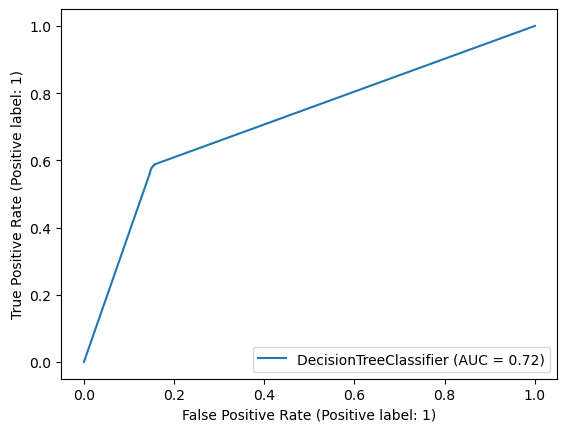

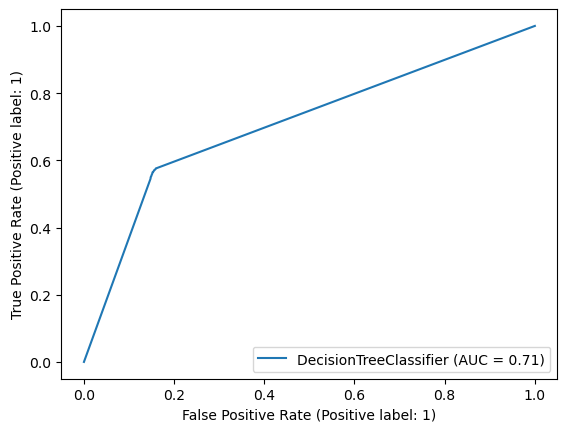

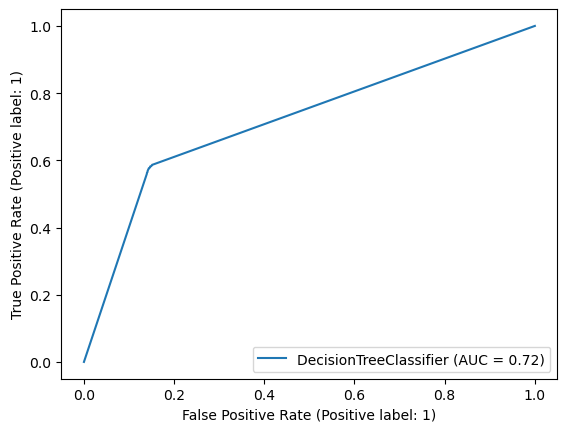

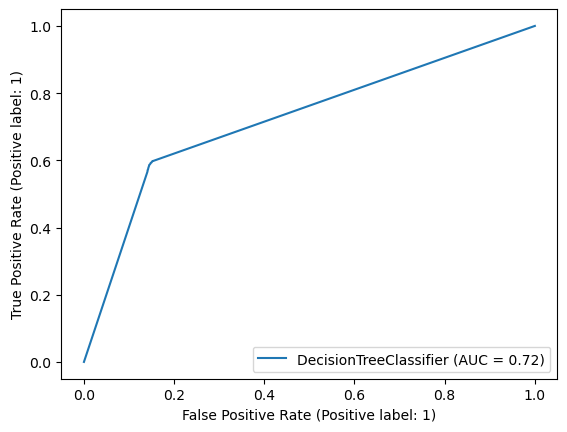

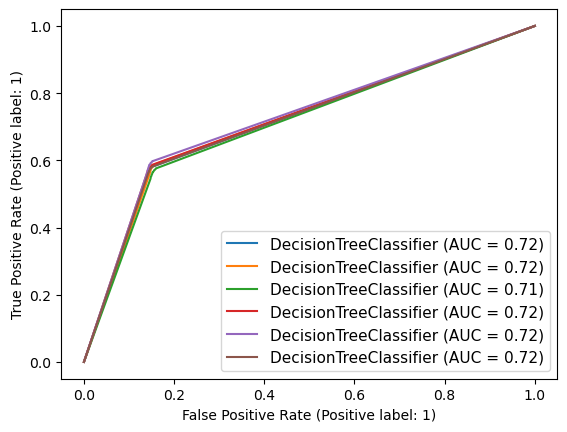

In [50]:
%%time

#lets find roc curve to check best fittted model
disp = RocCurveDisplay.from_estimator(dt1,X_test,y_test)
disp = RocCurveDisplay.from_estimator(dt2,X_test,y_test)
disp = RocCurveDisplay.from_estimator(dt3,X_test,y_test)
disp = RocCurveDisplay.from_estimator(dt4,X_test,y_test)
disp = RocCurveDisplay.from_estimator(dt5,X_test,y_test)

# here ax_ for axis with confustion matrics
RocCurveDisplay.from_estimator(dt1,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(dt2,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(dt3,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(dt4,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(dt5,X_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')